## Predicting Medical Expenses using Linear Regression

### Importing necessary modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Loading Dataset

In [2]:
#File_Path = ".."+ os.path.sep + "Python-Practice-code" + os.path.sep + "insurance.csv"
File_Path = "insurance.csv"
medical = pd.read_csv(File_Path)

In [3]:
print(File_Path)

insurance.csv


In [4]:
type(medical)

pandas.core.frame.DataFrame

In [5]:
medical.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [6]:
medical.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [7]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
### summarizing about the columns separately which are object or categorical type

In [9]:
print(medical.describe(include = ['object']))

         sex smoker     region
count   1338   1338       1338
unique     2      2          4
top     male     no  southeast
freq     676   1064        364


In [10]:
## We have to predict the expense column i.e. how it varies with the change of other columns or attributes

### Exploratory Data Analysis of the dataset

In [11]:
# Histogram plot

d:\python-practice-code\venv\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'expenses'}>]], dtype=object)

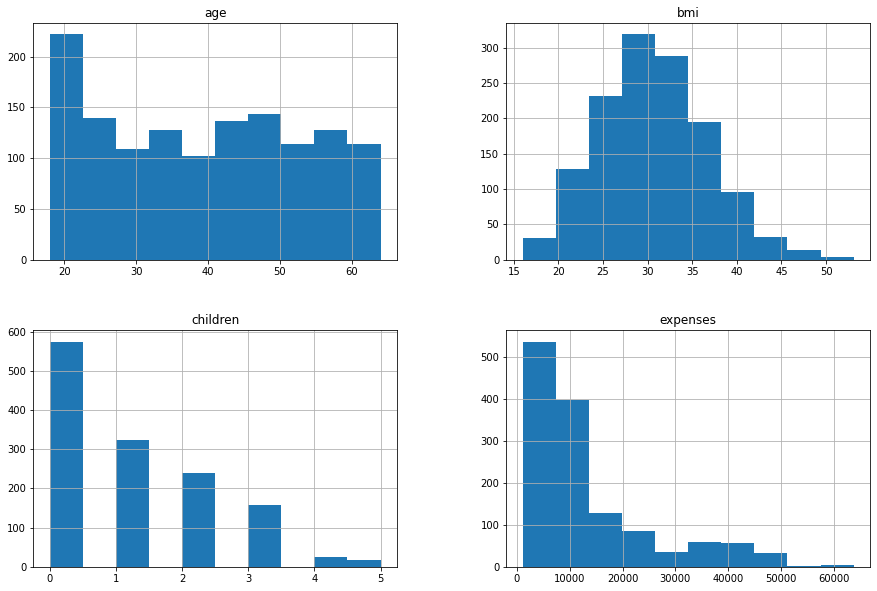

In [12]:
medical.hist(bins = 10, figsize=(15,10))

In [13]:
# Regression Plot

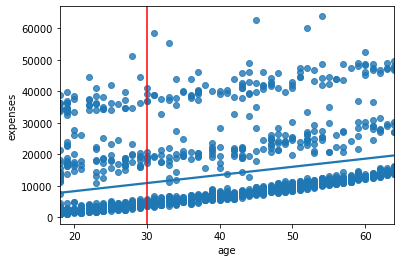

In [14]:
sns.regplot(x='age', y='expenses', data=medical,ci=None)
plt.axvline(30, color='r')

#### From this graph we can say that with the increase of age the expense is also increasing. In any particular age there are three distinguishable expense cluster and in the lowest cluster the dense of population is highest which is gradually decreasing for higher expense clusters. An example is shown here with the age '30'

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

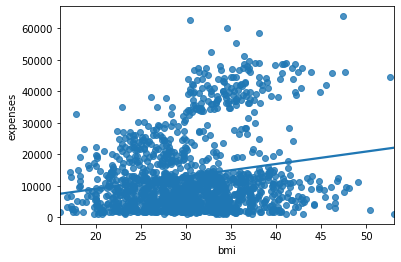

In [15]:
sns.regplot(x='bmi', y='expenses', data=medical,ci=None)

#### In this graph also we can see that the expense is gradually increasing with the increase of bmi.

Text(0, 0.5, 'mean_expenses')

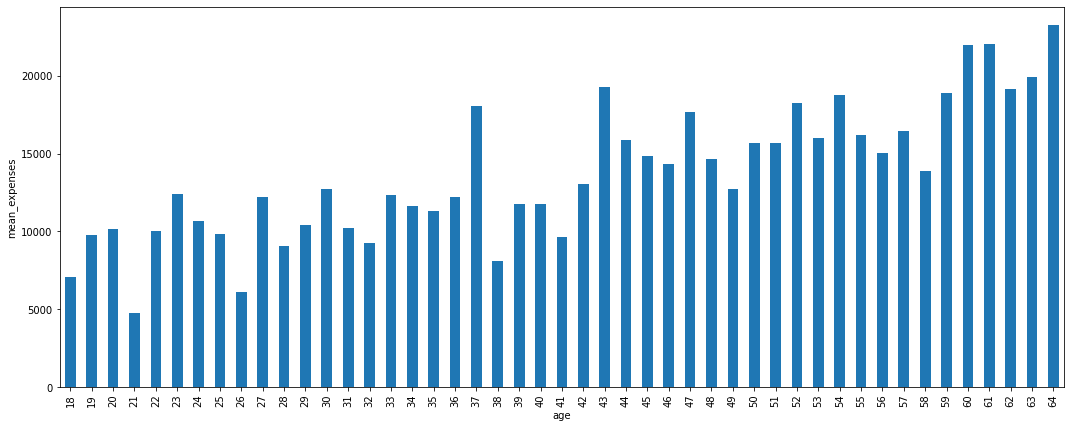

In [16]:
medical.groupby(by = 'age')['expenses'].mean().plot(kind = 'bar',figsize=(18,7))
plt.ylabel('mean_expenses')

#### If checking the mean expense for individual age group then we can see that as age increases the mean expense also increases

### Correlation

In [17]:
corr = medical.corr()

In [18]:
corr

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


In [19]:
#sns.heatmap(corr,annot=True,cmap='ocean')

<AxesSubplot:>

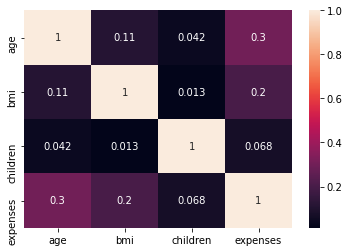

In [20]:
sns.heatmap(medical.corr(),annot= True)

In [21]:
corr.expenses.sort_values(ascending=False)

expenses    1.000000
age         0.299008
bmi         0.198576
children    0.067998
Name: expenses, dtype: float64

In [22]:
## It can be said from the correlation values that , expenses are more likely to be impacted by age

In [23]:
np.min(medical.age)

18

In [24]:
np.max(medical.age)

64

In [25]:
len(medical.age.unique())

47

In [26]:
len(np.ceil(medical.age).unique())

47

In [27]:
medical['age_cat']=np.ceil(medical.age / 18)

In [28]:
len(medical.age_cat.value_counts().sort_index(ascending= True))

4

In [29]:
medical.age_cat.value_counts().sort_index(ascending = True)

1.0     69
2.0    530
3.0    497
4.0    242
Name: age_cat, dtype: int64

In [30]:
count = medical.age_cat.value_counts()

<AxesSubplot:xlabel='age_cat', ylabel='count'>

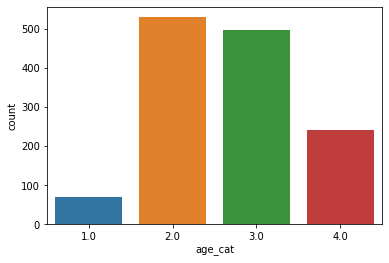

In [31]:
sns.countplot(x= 'age_cat', data= medical)

In [32]:
len(medical['bmi'].unique())

275

In [33]:
medical['bmi_cat']=np.ceil(medical.bmi / 16)

In [34]:
medical.bmi_cat.value_counts().sort_index(ascending = True) / len(medical)

1.0    0.000747
2.0    0.599402
3.0    0.396114
4.0    0.003737
Name: bmi_cat, dtype: float64

In [35]:
# Plot of the Mean Expense vs Attributes

age_cat


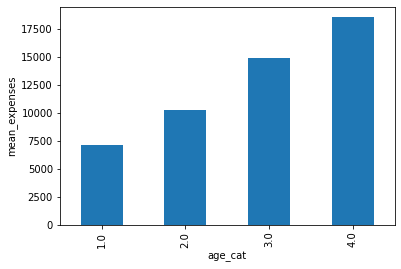

sex


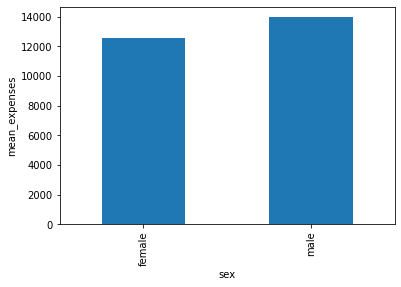

region


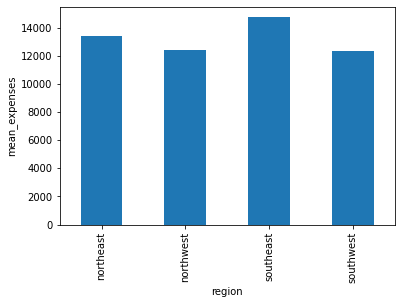

bmi_cat


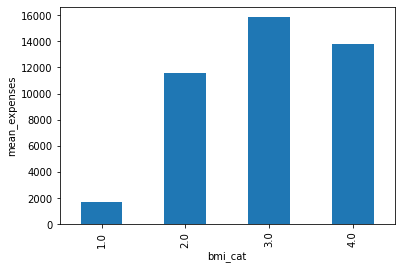

children


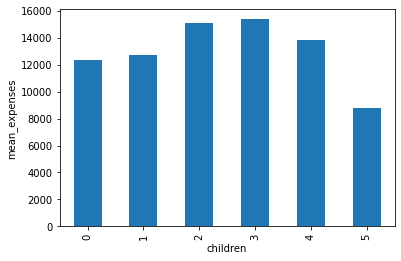

In [36]:
lst = ['age_cat','sex','region','bmi_cat','children']
for i in lst:
    data = medical.groupby(by = i)['expenses'].mean().plot(kind = 'bar')
    print(i)
    plt.ylabel('mean_expenses')
    plt.show()

#### Mean expense is highest for the age category 4.0 among all other age categories.
#### Mean expense is highest for Male among all genders.
#### Mean expense is higher for southwest region among all other regions.
#### Mean expense is higher for the bmi category 3.0 among all other categories of bmi.
#### Mean expense is higher for the category having 3 children followed by 2 children.

### Checking for the proportion of each age category in the dataset

In [37]:
medical.age_cat.value_counts().sort_index(ascending = True) / len(medical)

1.0    0.051570
2.0    0.396114
3.0    0.371450
4.0    0.180867
Name: age_cat, dtype: float64

## Splitting into test data and train data

In [38]:
from sklearn.model_selection import StratifiedShuffleSplit

In [39]:
strat_split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)

In [40]:
for train_ix, test_ix in strat_split.split(medical, medical.age_cat):
    strat_train = medical.iloc[train_ix]
    strat_test = medical.iloc[test_ix]

### Checking whether the categories of age are maintained in the train and test dataset

In [41]:
strat_train.age_cat.value_counts().sort_index(ascending = True) / len(strat_train)

1.0    0.051402
2.0    0.396262
3.0    0.371028
4.0    0.181308
Name: age_cat, dtype: float64

In [42]:
strat_test.age_cat.value_counts().sort_index(ascending = True) / len(strat_test)

1.0    0.052239
2.0    0.395522
3.0    0.373134
4.0    0.179104
Name: age_cat, dtype: float64

In [43]:
### We can see that the ratio of all the age_categories has been maintained properly in the strat_train and strat_test
### Now we want to drop this 'age_cat' column from these two dataframes as these attributes were introduced just for making
### the train and test datasets maintaining the proper categorical ratio of age otherwise the sole purpose of stratified
### shuffling would have been violated.

### After stratified shuffle split the datasets strat_train and strat_test are as below:

In [44]:
strat_train

,age,sex,bmi,children,smoker,region,expenses,age_cat,bmi_cat
376,39,female,24.9,3,yes,northeast,21659.93,3.0,2.0
1300,45,male,30.4,0,yes,southeast,62592.87,3.0,2.0
998,33,female,36.3,3,no,northeast,6551.75,2.0,3.0
800,42,female,26.2,1,no,southeast,7046.72,3.0,2.0
586,21,male,20.2,3,no,northeast,3861.21,2.0,2.0
...,...,...,...,...,...,...,...,...,...
569,48,male,40.6,2,yes,northwest,45702.02,3.0,3.0
133,19,male,25.6,0,no,northwest,1632.56,2.0,2.0
286,46,female,48.1,2,no,northeast,9432.93,3.0,4.0
846,51,female,34.2,1,no,southwest,9872.70,3.0,3.0


In [45]:
strat_test

,age,sex,bmi,children,smoker,region,expenses,age_cat,bmi_cat
61,25,male,33.7,4,no,southeast,4504.66,2.0,3.0
1185,45,male,23.6,2,no,northeast,8603.82,3.0,2.0
1183,48,female,27.4,1,no,northeast,9447.38,3.0,2.0
790,39,female,41.8,0,no,southeast,5662.23,3.0,3.0
146,46,male,30.5,3,yes,northwest,40720.55,3.0,2.0
...,...,...,...,...,...,...,...,...,...
1244,18,male,33.3,0,no,southeast,1135.94,1.0,3.0
411,44,female,20.2,1,yes,northeast,19594.81,3.0,2.0
1108,26,male,30.0,1,no,southwest,2904.09,2.0,2.0
551,32,female,28.9,0,no,southeast,3972.92,2.0,2.0


### Dropping the age_cat column from the strat_train and strat_test

In [46]:
strat_train = strat_train.drop('age_cat',axis = 1)
strat_test = strat_test.drop('age_cat', axis = 1)

In [47]:
strat_train

,age,sex,bmi,children,smoker,region,expenses,bmi_cat
376,39,female,24.9,3,yes,northeast,21659.93,2.0
1300,45,male,30.4,0,yes,southeast,62592.87,2.0
998,33,female,36.3,3,no,northeast,6551.75,3.0
800,42,female,26.2,1,no,southeast,7046.72,2.0
586,21,male,20.2,3,no,northeast,3861.21,2.0
...,...,...,...,...,...,...,...,...
569,48,male,40.6,2,yes,northwest,45702.02,3.0
133,19,male,25.6,0,no,northwest,1632.56,2.0
286,46,female,48.1,2,no,northeast,9432.93,4.0
846,51,female,34.2,1,no,southwest,9872.70,3.0


In [48]:
strat_test

,age,sex,bmi,children,smoker,region,expenses,bmi_cat
61,25,male,33.7,4,no,southeast,4504.66,3.0
1185,45,male,23.6,2,no,northeast,8603.82,2.0
1183,48,female,27.4,1,no,northeast,9447.38,2.0
790,39,female,41.8,0,no,southeast,5662.23,3.0
146,46,male,30.5,3,yes,northwest,40720.55,2.0
...,...,...,...,...,...,...,...,...
1244,18,male,33.3,0,no,southeast,1135.94,3.0
411,44,female,20.2,1,yes,northeast,19594.81,2.0
1108,26,male,30.0,1,no,southwest,2904.09,2.0
551,32,female,28.9,0,no,southeast,3972.92,2.0


### Now making the actual test and train datasets (x_train, x_test, y_train, y_test) by dropping the expenses column from train set and adding it only to test set.

In [49]:
x_train = strat_train.drop('expenses', axis = 1)
y_train = strat_train.expenses
x_test = strat_test.drop('expenses', axis = 1)
y_test = strat_test.expenses

### checking shape of each train and test set

In [50]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1070, 7), (268, 7), (1070,), (268,))

### checking whether percentage of train and test data set are according to the given ratio or not

In [51]:
(len(x_train)/len(medical))*100

79.97010463378177

In [52]:
(len(x_test)/len(medical))*100

20.029895366218238

In [53]:
x_test

,age,sex,bmi,children,smoker,region,bmi_cat
61,25,male,33.7,4,no,southeast,3.0
1185,45,male,23.6,2,no,northeast,2.0
1183,48,female,27.4,1,no,northeast,2.0
790,39,female,41.8,0,no,southeast,3.0
146,46,male,30.5,3,yes,northwest,2.0
...,...,...,...,...,...,...,...
1244,18,male,33.3,0,no,southeast,3.0
411,44,female,20.2,1,yes,northeast,2.0
1108,26,male,30.0,1,no,southwest,2.0
551,32,female,28.9,0,no,southeast,2.0


In [54]:
x_train

,age,sex,bmi,children,smoker,region,bmi_cat
376,39,female,24.9,3,yes,northeast,2.0
1300,45,male,30.4,0,yes,southeast,2.0
998,33,female,36.3,3,no,northeast,3.0
800,42,female,26.2,1,no,southeast,2.0
586,21,male,20.2,3,no,northeast,2.0
...,...,...,...,...,...,...,...
569,48,male,40.6,2,yes,northwest,3.0
133,19,male,25.6,0,no,northwest,2.0
286,46,female,48.1,2,no,northeast,4.0
846,51,female,34.2,1,no,southwest,3.0


In [55]:
y_train

376     21659.93
1300    62592.87
998      6551.75
800      7046.72
586      3861.21
          ...   
569     45702.02
133      1632.56
286      9432.93
846      9872.70
911     33732.69
Name: expenses, Length: 1070, dtype: float64

In [56]:
y_test

61       4504.66
1185     8603.82
1183     9447.38
790      5662.23
146     40720.55
          ...   
1244     1135.94
411     19594.81
1108     2904.09
551      3972.92
1274    17043.34
Name: expenses, Length: 268, dtype: float64

# Data Preprocessing

In [57]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 376 to 911
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1070 non-null   int64  
 1   sex       1070 non-null   object 
 2   bmi       1070 non-null   float64
 3   children  1070 non-null   int64  
 4   smoker    1070 non-null   object 
 5   region    1070 non-null   object 
 6   bmi_cat   1070 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 66.9+ KB


#### Separating numerical and categorical attributes

In [58]:
x_train_num = x_train.drop(['sex','smoker','region'],axis = 1)

In [59]:
x_train_num

,age,bmi,children,bmi_cat
376,39,24.9,3,2.0
1300,45,30.4,0,2.0
998,33,36.3,3,3.0
800,42,26.2,1,2.0
586,21,20.2,3,2.0
...,...,...,...,...
569,48,40.6,2,3.0
133,19,25.6,0,2.0
286,46,48.1,2,4.0
846,51,34.2,1,3.0


In [60]:
x_train_cat = x_train[['sex','smoker','region']]

In [61]:
x_train_cat

,sex,smoker,region
376,female,yes,northeast
1300,male,yes,southeast
998,female,no,northeast
800,female,no,southeast
586,male,no,northeast
...,...,...,...
569,male,yes,northwest
133,male,no,northwest
286,female,no,northeast
846,female,no,southwest


In [62]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 376 to 911
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1070 non-null   int64  
 1   sex       1070 non-null   object 
 2   bmi       1070 non-null   float64
 3   children  1070 non-null   int64  
 4   smoker    1070 non-null   object 
 5   region    1070 non-null   object 
 6   bmi_cat   1070 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 66.9+ KB


In [63]:
x_train_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 376 to 911
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1070 non-null   int64  
 1   bmi       1070 non-null   float64
 2   children  1070 non-null   int64  
 3   bmi_cat   1070 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 41.8 KB


In [64]:
x_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 376 to 911
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     1070 non-null   object
 1   smoker  1070 non-null   object
 2   region  1070 non-null   object
dtypes: object(3)
memory usage: 33.4+ KB


#### We can see from the above that there are no null values in x_train and x_test itself. So most likely, we won't need null value imputation

# Scaling

In [65]:
### Normally we follow standard scaling to avoid the error of saturation which is caused for min-max scaling
### Min-Max scaling brings all the data in a prticular range for which we can't distinguish data with a very high value and
### a very low value. This problem can be avoided through standard scaling. Standard scaling doesn't bring the data in any
### particular range. Rather after this the values remain distinguishable and a curve like normal distribution can be found
### It is for doing the scaling operation on the numerical data

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
scaler = StandardScaler()

In [68]:
x_train_num_ndarray = scaler.fit_transform(x_train_num)

In [69]:
x_train_num_ndarray

array([[-0.01198313, -0.94901381,  1.57270008, -0.79947829],
       [ 0.41305388, -0.04712503, -0.8947326 , -0.79947829],
       [-0.43702014,  0.92035566,  1.57270008,  1.20389822],
       ...,
       [ 0.48389338,  2.85531705,  0.75022252,  3.20727473],
       [ 0.83809088,  0.57599813, -0.07225504,  1.20389822],
       [-1.49961265,  0.16604868, -0.8947326 , -0.79947829]])

In [70]:
x_train_num_ndarray[:10]

array([[-0.01198313, -0.94901381,  1.57270008, -0.79947829],
       [ 0.41305388, -0.04712503, -0.8947326 , -0.79947829],
       [-0.43702014,  0.92035566,  1.57270008,  1.20389822],
       [ 0.20053537, -0.7358401 , -0.07225504, -0.79947829],
       [-1.28709415, -1.71971877,  1.57270008, -0.79947829],
       [ 0.76725138,  0.05126284,  1.57270008, -0.79947829],
       [ 1.05060938,  0.01846688,  1.57270008, -0.79947829],
       [ 1.54648589,  0.08405879, -0.8947326 , -0.79947829],
       [ 1.47564639, -0.32589065, -0.07225504, -0.79947829],
       [ 1.33396739,  1.37949904, -0.8947326 ,  1.20389822]])

## OneHot Encoding

In [71]:
from sklearn.preprocessing import OneHotEncoder

In [72]:
hot_encoder = OneHotEncoder(sparse = False)

In [73]:
x_train_cat_hot_encoded_ndarray = hot_encoder.fit_transform(x_train_cat[['sex','smoker','region']].values)

In [74]:
x_train_cat.head(10)

,sex,smoker,region
376,female,yes,northeast
1300,male,yes,southeast
998,female,no,northeast
800,female,no,southeast
586,male,no,northeast
1333,male,no,northwest
96,female,no,southwest
332,female,no,northwest
466,female,no,southwest
386,female,no,southeast


In [75]:
hot_encoder.categories_

[array(['female', 'male'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [76]:
x_train_cat_hot_encoded_ndarray[:10]

array([[1., 0., 0., 1., 1., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 1., 0.],
       [1., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0., 1., 0.],
       [0., 1., 1., 0., 1., 0., 0., 0.],
       [0., 1., 1., 0., 0., 1., 0., 0.],
       [1., 0., 1., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0., 1., 0., 0.],
       [1., 0., 1., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0., 0., 1., 0.]])

# Combining Preprocessed Results

In [77]:
x_train_final = np.c_[x_train_num_ndarray, x_train_cat_hot_encoded_ndarray]

In [78]:
x_train_final.shape

(1070, 12)

In [79]:
x_train_final

array([[-0.01198313, -0.94901381,  1.57270008, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.41305388, -0.04712503, -0.8947326 , ...,  0.        ,
         1.        ,  0.        ],
       [-0.43702014,  0.92035566,  1.57270008, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.48389338,  2.85531705,  0.75022252, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.83809088,  0.57599813, -0.07225504, ...,  0.        ,
         0.        ,  1.        ],
       [-1.49961265,  0.16604868, -0.8947326 , ...,  0.        ,
         0.        ,  0.        ]])

### Applying Linear Regression Model just to check how much the prediction is varying from the actual label

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
lin_reg = LinearRegression()

In [82]:
type(lin_reg)

sklearn.linear_model._base.LinearRegression

In [83]:
### Here we want the model to determine the relation between y and x . So here we need to give both x and y 
### as the arguments of the model.In other cases where fit was a part of data preprocessor there we only needed
### to learn something particular from any attribute

In [84]:
lin_reg.fit(x_train_final, y_train)

LinearRegression()

In [85]:
### we want our model to predict that train dataset first, which we used for learning to check whether the prediction on the
### training set is going perfectly or not.

In [86]:
y_hat = lin_reg.predict(x_train_final)

In [87]:
y_train[0:5]

376     21659.93
1300    62592.87
998      6551.75
800      7046.72
586      3861.21
Name: expenses, dtype: float64

In [88]:
y_hat[0:5]

array([31535.86836995, 32110.88835969, 10602.338322  ,  6772.21176189,
        1624.00906177])

In [89]:
x_train

,age,sex,bmi,children,smoker,region,bmi_cat
376,39,female,24.9,3,yes,northeast,2.0
1300,45,male,30.4,0,yes,southeast,2.0
998,33,female,36.3,3,no,northeast,3.0
800,42,female,26.2,1,no,southeast,2.0
586,21,male,20.2,3,no,northeast,2.0
...,...,...,...,...,...,...,...
569,48,male,40.6,2,yes,northwest,3.0
133,19,male,25.6,0,no,northwest,2.0
286,46,female,48.1,2,no,northeast,4.0
846,51,female,34.2,1,no,southwest,3.0


In [90]:
x_train.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'bmi_cat'], dtype='object')

In [91]:
x_train.columns[[1,4,5]]

Index(['sex', 'smoker', 'region'], dtype='object')

In [92]:
x_train.columns[[0,2,3]]

Index(['age', 'bmi', 'children'], dtype='object')

In [93]:
x_train[['age', 'sex', 'bmi', 'children', 'smoker', 'region']].values

array([[39, 'female', 24.9, 3, 'yes', 'northeast'],
       [45, 'male', 30.4, 0, 'yes', 'southeast'],
       [33, 'female', 36.3, 3, 'no', 'northeast'],
       ...,
       [46, 'female', 48.1, 2, 'no', 'northeast'],
       [51, 'female', 34.2, 1, 'no', 'southwest'],
       [18, 'male', 31.7, 0, 'yes', 'northeast']], dtype=object)

In [94]:
### Using Custom Transformer to apply the preprocessing steps on train dataset and test dataset by pipelining
### DataFrameSelector custom Transformer will select the sttributes as required
### Base Estimator helps with basic estimation So we don't need to write set_params and get_params
### TransformerMixin provides fit and transform methods.

# Custom Transformer

In [95]:
from sklearn.base import BaseEstimator, TransformerMixin

In [96]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self,attrs=[]):
        self.attrs = attrs
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attrs].values

In [97]:
ds = DataFrameSelector(attrs = x_train.columns[[1,4,5]])
ds.fit_transform(x_train).shape

(1070, 3)

In [98]:
ds = DataFrameSelector(attrs = x_train.columns[[0,2,3]])
ds.fit_transform(x_train).shape

(1070, 3)

In [99]:
x_train.columns[[1,4,5]]

Index(['sex', 'smoker', 'region'], dtype='object')

## Importing Ordinal Encoder for Pipelining purpose

In [100]:
from sklearn.preprocessing import OrdinalEncoder

In [101]:
ord_encoder = OrdinalEncoder()

# Pipelining

In [102]:
from sklearn.pipeline import Pipeline, FeatureUnion

In [103]:
num_pipe = Pipeline([
        ('Selector', DataFrameSelector(attrs = x_train.columns[[0,2,3]])),
        ('Scaler', StandardScaler())])
cat_pipe1 = Pipeline([
        ('Selector', DataFrameSelector(attrs = x_train.columns[[5]])),
        ('Hot_Encoder', OneHotEncoder(sparse=False))])
cat_pipe2 = Pipeline([
        ('Selector', DataFrameSelector(attrs = x_train.columns[[1,4]])),
        ('Ord_Encoder', OrdinalEncoder())])

full_pipe = FeatureUnion([
        ('num_pipe', num_pipe),
        ('cat_pipe1', cat_pipe1),
        ('cat_pipe2', cat_pipe2)])

### To reduce the number of features or attributes we used OneHot Encoder only on Region attribute and applied Ordinal_Encoder only on sex and smoker attributes

### If we wouldn't have applied these then the number of features would be 11 after combining the results of all preprocessing steps.

### Here by this way we got total 9 attributes . So by Pipelining process we are doing the preprocessing part again on x_train and x_test

# Applying Full PipeLine on Train Dataset

In [104]:
x_train_final_pipe = full_pipe.fit_transform(x_train)

In [105]:
x_train_final_pipe.shape

(1070, 9)

# Applying Full PipeLine on Test Dataset

In [106]:
x_test_final_pipe = full_pipe.fit_transform(x_test)

In [107]:
x_test_final_pipe.shape

(268, 9)

In [108]:
x_test

,age,sex,bmi,children,smoker,region,bmi_cat
61,25,male,33.7,4,no,southeast,3.0
1185,45,male,23.6,2,no,northeast,2.0
1183,48,female,27.4,1,no,northeast,2.0
790,39,female,41.8,0,no,southeast,3.0
146,46,male,30.5,3,yes,northwest,2.0
...,...,...,...,...,...,...,...
1244,18,male,33.3,0,no,southeast,3.0
411,44,female,20.2,1,yes,northeast,2.0
1108,26,male,30.0,1,no,southwest,2.0
551,32,female,28.9,0,no,southeast,2.0


In [109]:
x_test_num = x_test.drop(['sex','smoker','region'],axis = 1)

In [110]:
x_test_cat = x_test[['sex','smoker','region']]

In [111]:
x_test_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 61 to 1274
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       268 non-null    int64  
 1   bmi       268 non-null    float64
 2   children  268 non-null    int64  
 3   bmi_cat   268 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 10.5 KB


In [112]:
x_test_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 61 to 1274
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     268 non-null    object
 1   smoker  268 non-null    object
 2   region  268 non-null    object
dtypes: object(3)
memory usage: 8.4+ KB


In [113]:
x_train.shape

(1070, 7)

In [114]:
x_test.shape

(268, 7)

In [115]:
y_train.shape

(1070,)

In [116]:
y_test.shape

(268,)

# Using Model for prediction and calculation of MSE and RMSE

### Linear Regression model

In [117]:
x_train_final_pipe.shape

(1070, 9)

In [118]:
y_train.shape

(1070,)

In [119]:
Lin_reg = LinearRegression()

In [120]:
Lin_reg.fit(x_train_final_pipe, y_train)

LinearRegression()

### prediction of y_train

In [121]:
y_pred_train_regression = Lin_reg.predict(x_train_final_pipe)

In [122]:
from sklearn.metrics import mean_squared_error

In [123]:
y_train

376     21659.93
1300    62592.87
998      6551.75
800      7046.72
586      3861.21
          ...   
569     45702.02
133      1632.56
286      9432.93
846      9872.70
911     33732.69
Name: expenses, Length: 1070, dtype: float64

In [124]:
type(y_train)

pandas.core.series.Series

In [125]:
y_pred_train_regression

array([31557.05795221, 32416.54961419, 10430.13335309, ...,
       17611.23256295, 12065.6973032 , 27170.43577068])

In [126]:
type(y_pred_train_regression)

numpy.ndarray

In [127]:
mse_reg_train = mean_squared_error(y_train, y_pred_train_regression)

In [128]:
rmse_reg_train = np.sqrt(mse_reg_train)

In [129]:
rmse_reg_train

5905.718465065766

In [130]:
x_test_final_pipe.shape

(268, 9)

In [131]:
y_pred_test_regression = Lin_reg.predict(x_test_final_pipe)

In [132]:
mse_reg_test = mean_squared_error(y_test, y_pred_test_regression)

In [133]:
rmse_reg_test = np.sqrt(mse_reg_test)

In [134]:
rmse_reg_test

6579.293526748946

In [135]:
# Calculating R2 Score 
# R2 score helps to know how fit the model is for the problem
# R-squared is a statistical measure of how close the data are to the fitted regression line. 
# Also known as coefficient of determination
# basically varies from 0 to 1 or 0% to 100% 
# 0% means the model explains none of the variability of the data around the mean
# 100% means the model explains all the variablity of the data around the mean
# It can be negative also when the model is extremely worse.
# If a model always gives the expected value of y disregarding the features then it gets R2 score as 0
# Higher the score better the model will be fit for the problem

In [136]:
from sklearn.metrics import r2_score

In [137]:
r2_score(y_train, y_pred_train_regression)

0.758530031177981

In [138]:
r2_score(y_test, y_pred_test_regression)

0.7203597839412395

#### For train set the score is approx 75.83% and for test set it's almost 72.03%

##### RMSE of Linear Regression Model on Test Dataset is quite higher than that of the Train Dataset

### Decision Tree Model

In [139]:
from sklearn.tree import DecisionTreeRegressor

In [140]:
tree_reg = DecisionTreeRegressor()

In [141]:
tree_reg.fit(x_train_final_pipe, y_train)

DecisionTreeRegressor()

In [142]:
y_pred_train_tree = tree_reg.predict(x_train_final_pipe)

In [143]:
mse_tree_train = mean_squared_error(y_train, y_pred_train_tree)

In [144]:
rmse_tree_train = np.sqrt(mse_tree_train)

In [145]:
rmse_tree_train

494.2061177475097

In [146]:
y_pred_test_tree = tree_reg.predict(x_test_final_pipe)

In [147]:
mse_tree_test = mean_squared_error(y_test, y_pred_test_tree)

In [148]:
rmse_tree_test = np.sqrt(mse_tree_test)

In [149]:
rmse_tree_test

6730.980986184886

#### Decision Tree seems to be overfit model as it has a low rmse for train set and high rmse for test set

## calculating R2_Score for Decision Tree Train set and Test Set

In [150]:
r2_score(y_train, y_pred_train_tree)

0.9983090378709384

In [151]:
r2_score(y_test, y_pred_test_tree)

0.7073167749272775

#### For Trainset it showed approx 100% (99.83%) score in train set but for test set it showed only 69% , so concluding this model to be overfit model as the model is performing quite poor for test set in this case

### Random Forest Model

In [152]:
from sklearn.ensemble import RandomForestRegressor

In [153]:
forest_reg = RandomForestRegressor()

In [154]:
forest_reg.fit(x_train_final_pipe, y_train)

RandomForestRegressor()

In [155]:
y_pred_train_forest = forest_reg.predict(x_train_final_pipe)

In [156]:
mse_forest_train = mean_squared_error(y_train, y_pred_train_forest)

In [157]:
rmse_forest_train = np.sqrt(mse_forest_train)

In [158]:
rmse_forest_train

1797.7138953318297

In [159]:
y_pred_test_forest = forest_reg.predict(x_test_final_pipe)

In [160]:
mse_forest_test = mean_squared_error(y_test, y_pred_test_forest)

In [161]:
rmse_forest_test = np.sqrt(mse_forest_test)

In [162]:
rmse_forest_test

5081.862702989401

In [163]:
r2_score(y_train, y_pred_train_forest)

0.9776252187854331

In [164]:
r2_score(y_test, y_pred_test_forest)

0.8331650792481795

In [165]:
# For Trainset Random forest showed 97.7% R2 score whereas for Testset it showed 82.65% score
# Comparing all the test set scores we will take up the Random Forest for further parameter tuning as amongs all the models
# this model gave highest R2 score for the Test Dataset.

#### We can see that among all the models (Linear Regression, Decision Tree, Random Forest), we got the RMSE score lowest for the test data set in Random Forest Alogorithm
#### Decision Tree algorithm seemed to be overfitting model as it performed well in train set but its RMSE was higher in test data set than train data set

# K-Fold Cross Validation

### Cross validation for Linear Regression

In [166]:
from sklearn.model_selection import cross_val_score

In [167]:
mses_reg = -cross_val_score(lin_reg, x_train_final, y_train, cv = 6, scoring = 'neg_mean_squared_error')

In [168]:
mses_reg

array([34199060.27586628, 40452811.59663513, 30727922.33646742,
       38582702.19433843, 35397740.01010169, 34492277.36540591])

### Cross validation for Decision Tree

In [169]:
mses_tree = -cross_val_score(tree_reg, x_train_final, y_train, cv = 6, scoring= 'neg_mean_squared_error')

In [170]:
mses_tree

array([36380662.4106866 , 46540457.07815196, 47031742.0102146 ,
       42576497.82808596, 48507825.54456855, 30314262.19398539])

### Cross validation for Random Forest

In [171]:
mses_forest = -cross_val_score(forest_reg, x_train_final, y_train, cv = 6, scoring = 'neg_mean_squared_error')

In [172]:
mses_forest

array([19542339.00105851, 27854106.90804621, 18601760.91134448,
       25652633.61558908, 23071460.58629018, 20770585.3647511 ])

#### In cross validation also, The cross validation score on the metric Mean squared error seemed to be low in Random Forest algorithm.
#### So in hyperparameter tuning we are taking random forest as our base model

# Hyper parameter tuning 

In [173]:
from pprint import pprint

In [174]:
print('Parameters currently in use:\n')
pprint(forest_reg.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [175]:
from sklearn.model_selection import GridSearchCV

In [176]:
param_grid = [{'n_estimators':[int(x) for x in np.linspace(start = 50, stop = 250, num = 20)], 
               'max_features':[2, 4, 6], 
               'bootstrap': [True]},
            {'bootstrap': [False], 
             'n_estimators':[int(x) for x in np.linspace(start = 5, stop = 150, num = 20)], 
             'max_features': [2, 3, 4]}]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=6, scoring = 'neg_mean_squared_error', return_train_score = True)

In [177]:
grid_search.fit(x_train_final_pipe, y_train)

GridSearchCV(cv=6, estimator=RandomForestRegressor(),
             param_grid=[{'bootstrap': [True], 'max_features': [2, 4, 6],
                          'n_estimators': [50, 60, 71, 81, 92, 102, 113, 123,
                                           134, 144, 155, 165, 176, 186, 197,
                                           207, 218, 228, 239, 250]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [5, 12, 20, 27, 35, 43, 50, 58, 66,
                                           73, 81, 88, 96, 104, 111, 119, 127,
                                           134, 142, 150]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [178]:
grid_search.best_params_

{'bootstrap': True, 'max_features': 4, 'n_estimators': 197}

In [179]:
best_model = grid_search.best_estimator_

# Fitting the train dataset to the best model and predicting the test set

In [180]:
best_model.fit(x_train_final_pipe, y_train)

RandomForestRegressor(max_features=4, n_estimators=197)

In [181]:
y_pred_train_best_model = best_model.predict(x_train_final_pipe)

In [182]:
y_pred_test_best_model = best_model.predict(x_test_final_pipe)

In [183]:
mse_train_best_model = mean_squared_error(y_train, y_pred_train_best_model)

In [184]:
rmse_train_best_model = np.sqrt(mse_train_best_model)

In [185]:
rmse_train_best_model

1725.1311443506656

In [186]:
mse_test_best_model = mean_squared_error(y_test, y_pred_test_best_model)

In [187]:
rmse_test_best_model = np.sqrt(mse_test_best_model)

In [188]:
rmse_test_best_model

5114.76547557559

In [189]:
r2_score(y_train, y_pred_train_best_model)

0.9793955095817433

In [190]:
r2_score(y_test, y_pred_test_best_model)

0.8309977235939888

### calculating r2_score for the Best model for Train and Test dataset after hyper parameter tuning

In [191]:
mses_best_model_hpt_r2_train = cross_val_score(best_model, x_train_final_pipe, y_train, cv = 6, scoring = 'r2')

In [192]:
mses_best_model_hpt_r2_train.mean()

0.8465341884526572

In [193]:
mses_best_model_hpt_r2_test = cross_val_score(best_model, x_test_final_pipe, y_test, cv = 6, scoring = 'r2')

In [194]:
mses_best_model_hpt_r2_test.mean()

0.817744646065378

#### The Model which we got after hyper parameter tuning of Random Forest Regressor model has been counted as Best Model. 
#### After Hyperparameter tuning  Best Model gives the R2 score as almost 85% for train dataset and for test dataset it gives the R2 score as almost 81%
#### That means for the train set it gives 84% of the changeability of the dependent output variable and for the test set it gives 81% of the changeability of the dependent output variables.